In [59]:
import pandas as pd
import os, sys
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [65]:
googlegroups = [group.split('.')[0] for group in os.listdir('../data/mbox/')]

gg_dfs = []

for group in googlegroups:
    
    gg_df = pd.read_csv('../data/posts/' + group + '-posts.csv', parse_dates=['date'], infer_datetime_format=True)
    gg_dfs.append(gg_df)

gg_posts = pd.concat(gg_dfs)

In [80]:
grouped = gg_posts.groupby('fid')
forums = pd.DataFrame({'count' : grouped.size()}).reset_index()
forums.columns = ['fid', 'threads']
print forums.describe()

           threads
count    36.000000
mean    995.388889
std    1403.495703
min       2.000000
25%     213.750000
50%     334.500000
75%    1263.500000
max    5570.000000


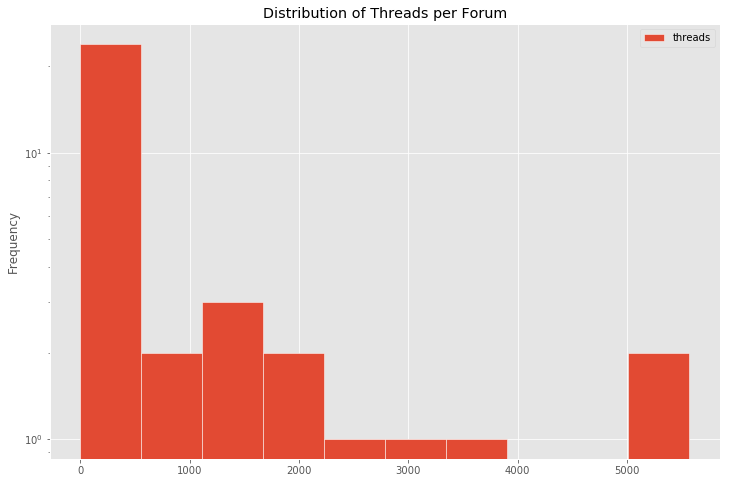

In [83]:
forums.plot.hist(log=True, figsize=(12, 8), edgecolor='w')
plt.title('Distribution of Threads per Forum')
plt.plot()
plt.show()

In [63]:
members = pd.read_csv('../data/network/posting_statistics.csv')
members.head()

,user,posts,op,replies
0,jeff@publiclab.org,6468,2496,3972
1,liz@publiclab.org,4283,1940,2343
2,stevie@publiclab.org,3072,2361,711
3,shannon@publiclab.org,2465,1916,549
4,cfastie@gmail.com,993,153,840


In [64]:
print members.describe()

             posts           op      replies
count  1848.000000  1848.000000  1848.000000
mean     19.320346     7.706169    11.614177
std     207.331398   102.693317   115.048578
min       0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       2.000000     1.000000     1.000000
75%       5.000000     1.000000     4.000000
max    6468.000000  2496.000000  3972.000000


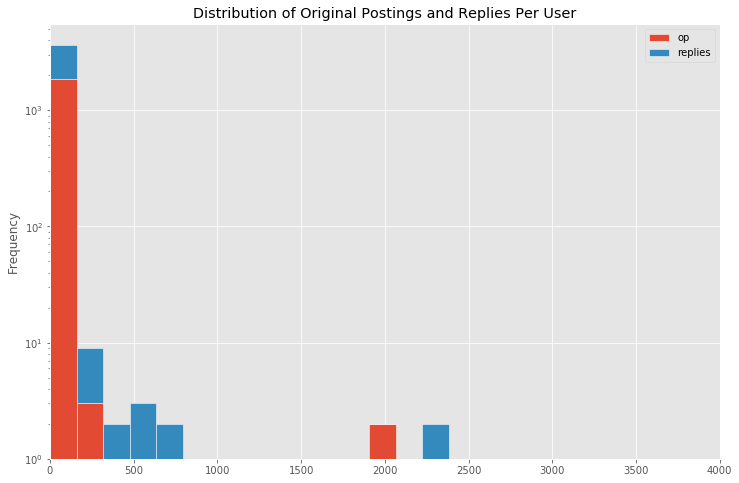

In [75]:
posts = members[['op', 'replies']]
posts.plot.hist(stacked=True, log=True, bins=25, figsize=(12, 8), xlim=(0,4000), edgecolor='w')
plt.title('Distribution of Original Postings and Replies Per User')
plt.plot()
plt.show()

In [66]:
grouped = gg_posts.groupby('tid')# grouped.head
threads = pd.DataFrame({'count' : grouped.size()}).reset_index()
threads.columns = ['tid', 'posts']
print threads.describe()

             posts
count  9913.000000
mean      3.614849
std       5.442760
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max     158.000000


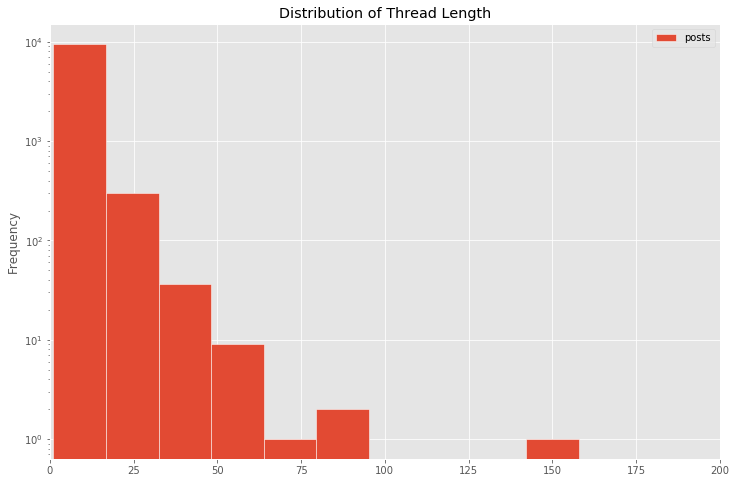

In [74]:
threads.plot.hist(log=True, figsize=(12, 8), xlim=(0,200), edgecolor='w')
plt.title('Distribution of Thread Length')
plt.plot()
plt.show()

In [84]:
edges = pd.read_csv('../data/network/plots_edgelist.csv', parse_dates=['date'], infer_datetime_format=True, index_col='date')
edges.index = edges.index.date
# edges.head()

pivot = pd.pivot_table(edges, index=edges.index, columns='fid', aggfunc='size', fill_value=0)
# pivot.head(20)

In [85]:
loc_cols = [ u'plots-barnraising', u'Publiclab-mountainwest', u'laboratoriopublico', u'plots-amsterdam', u'plots-baltimore-dc', u'plots-boston', 
             u'plots-gulfcoast', u'plots-norcal', u'plots-nyc', u'plots-philadelphia',  u'plots-providence', u'plots-skane', 
             u'plots-southeast', u'public-lab-chicago', u'public-lab-northwest', u'public-lab-vancouver', u'publiclab-jerusalem', 
             u'publiclab-la', u'publiclab-midwest', u'publiclab-northeast', u'publiclab-portugues', 'plots-butte']

tools_cols = [u'grassrootsmapping', u'plots-airquality', u'plots-alpha', u'plots-dev', u'plots-education', 
              u'plots-gsoc', u'plots-infrared', u'plots-kickstarter', u'plots-organizers', u'plots-potentiostat',
              u'plots-spectrometry', u'plots-waterquality',  u'public-lab-writing-group', u'publiclaboratory']

locations = pivot[loc_cols]
tools = pivot[tools_cols]

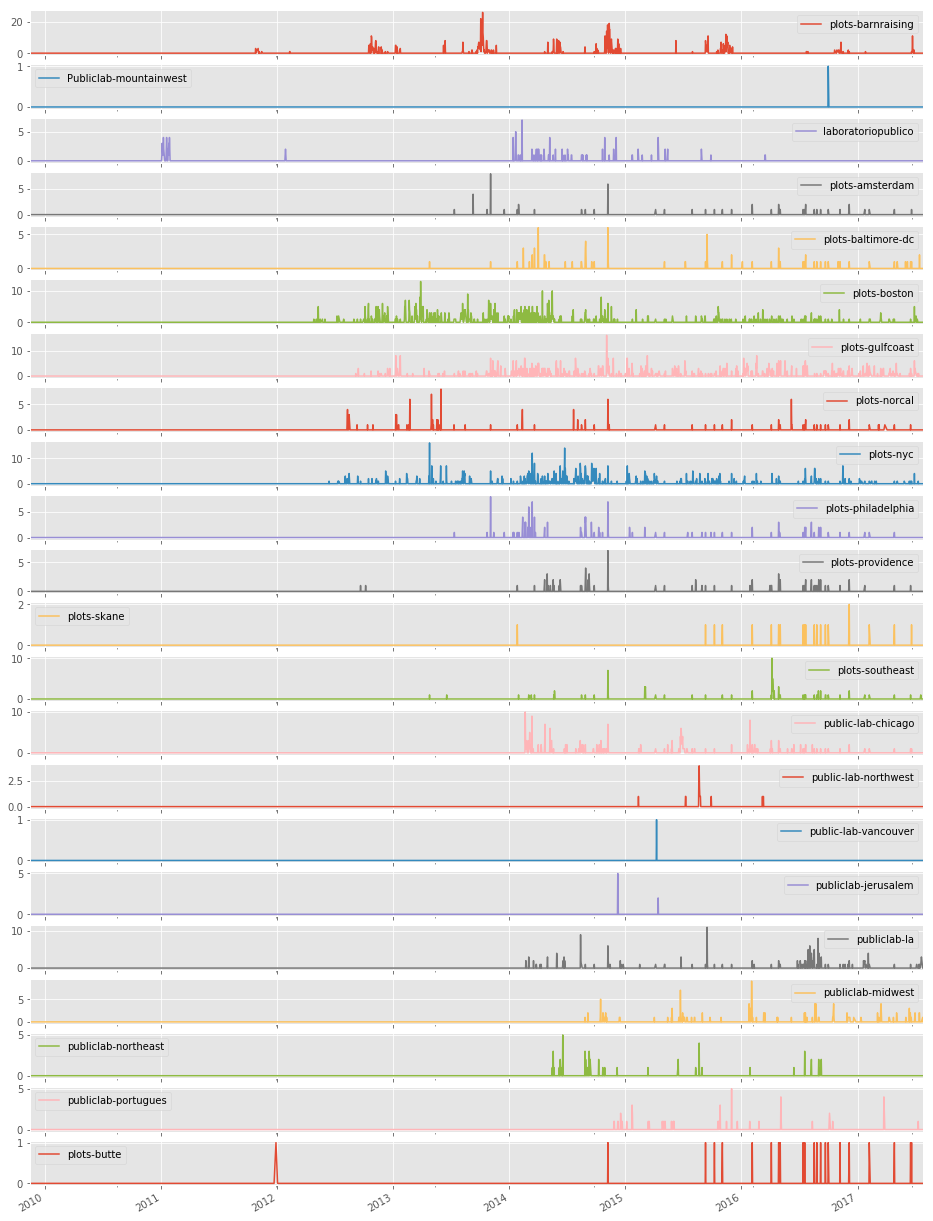

In [87]:
locations.plot(subplots=True, figsize=(16,24))
plt.title('Location Forums - Posts Per Day')
plt.show()

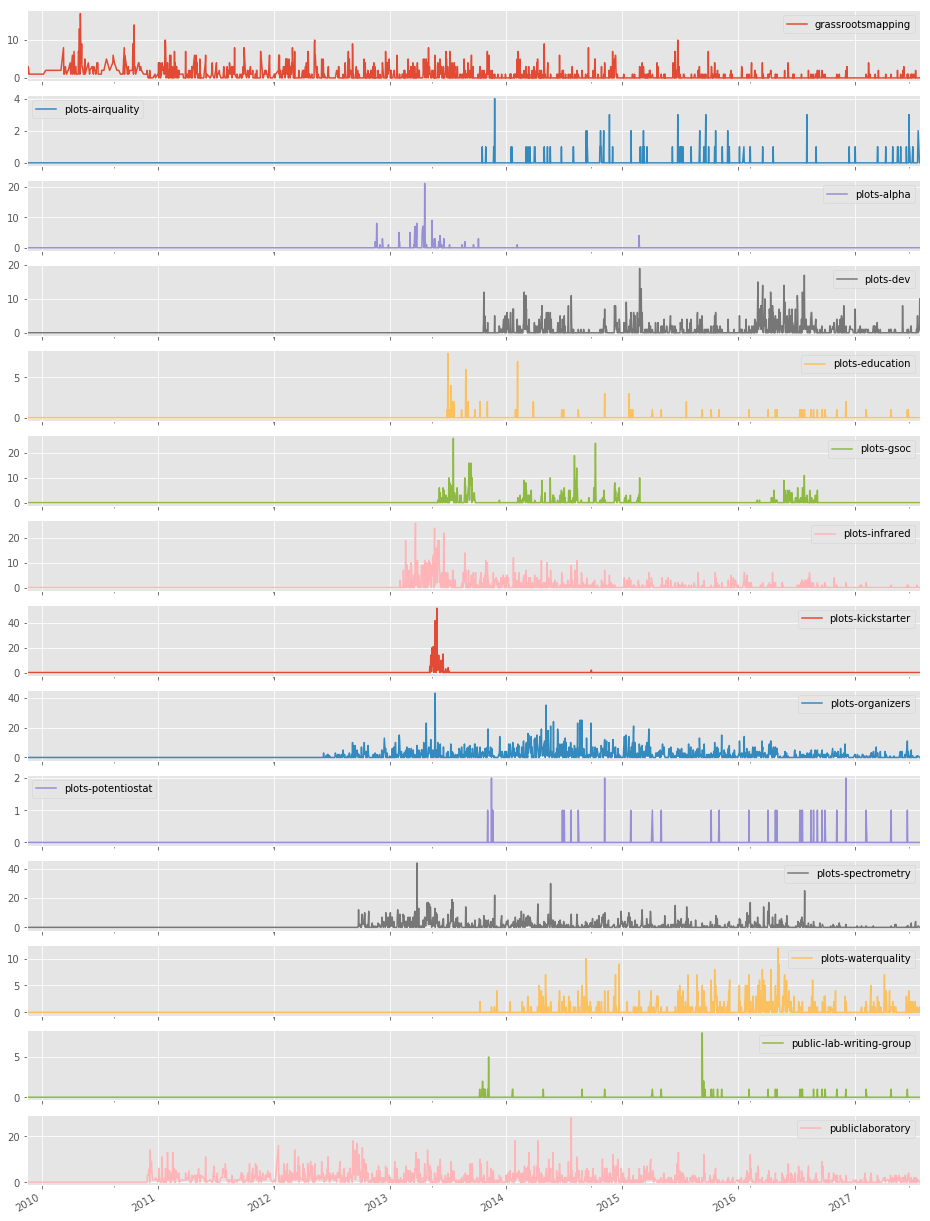

In [7]:
tools.plot(subplots=True, figsize=(16,24))
plt.title('Tool Forums - Posts Per Day')
plt.show()

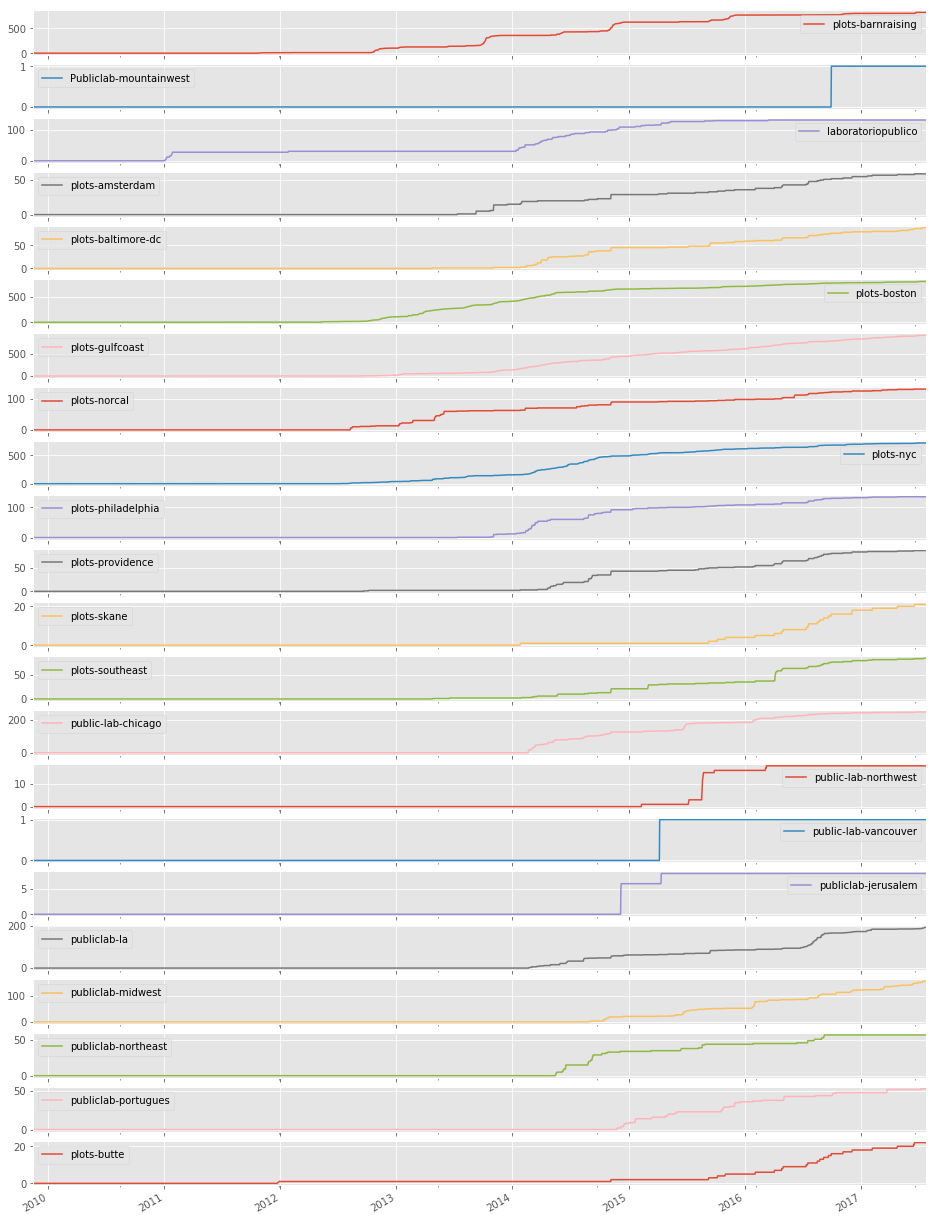

In [8]:
loc_cs = locations.cumsum()
loc_cs.plot(subplots=True, figsize=(16,24))
plt.title('Location Forums - Cumulative Posts Over Time')
plt.show()

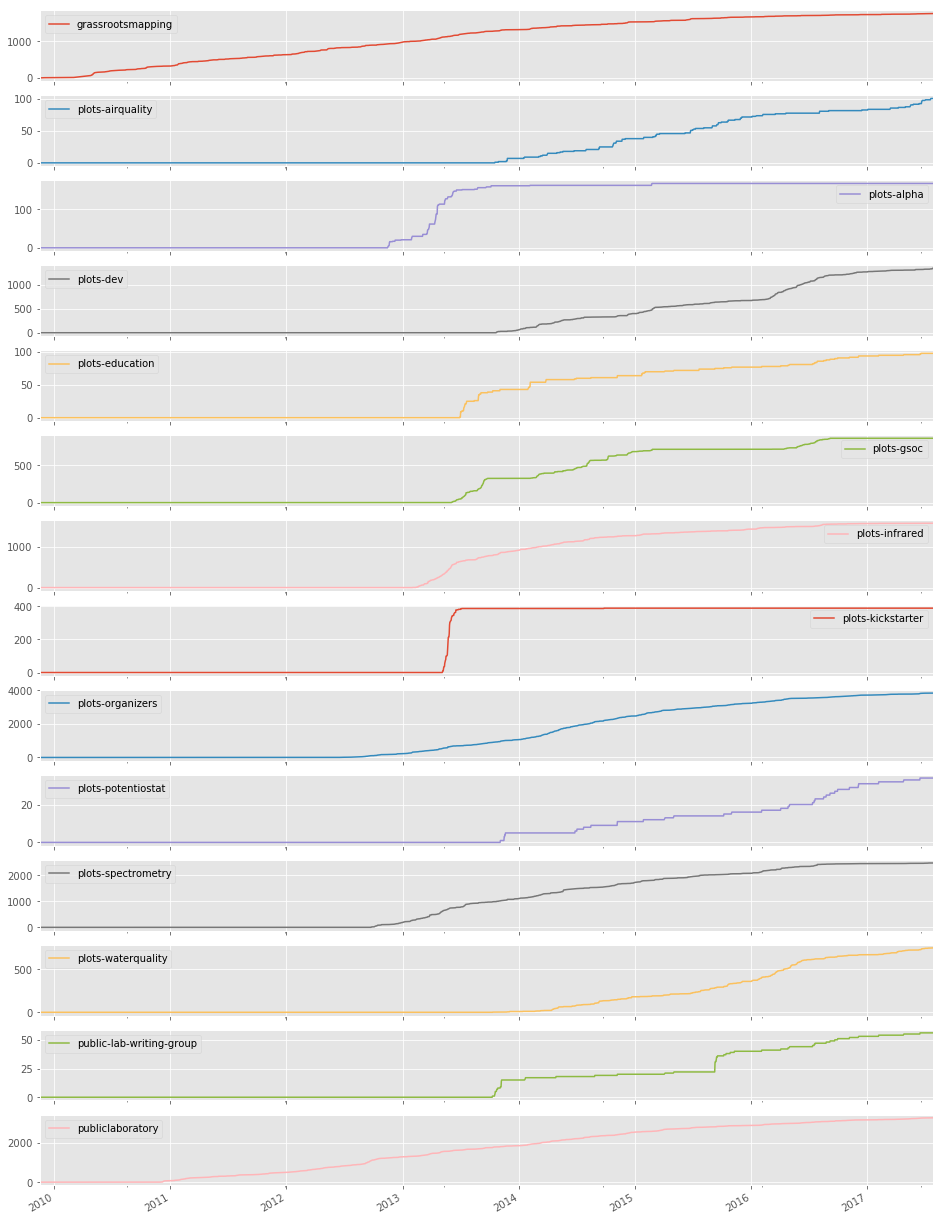

In [9]:
tools_cs = tools.cumsum()
tools_cs.plot(subplots=True, figsize=(16,24))
plt.title('Tool Forums - Cumulative Posts Over Time')
plt.show()